<h1 style="text-align: center;"> EE6310 - IMAGE AND VIDEO PROCESSING - ASSIGNMENT 4</h1>
<h2 style="text-align: right;">  ATHARV RAMESH NAIR <br>EE20BTECH11006</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h2 style="text-align: center;"> EDGE DETECTION</h2>


### Loading the Image

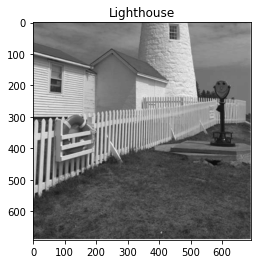

In [2]:
I = plt.imread('lighthouse.png')
plt.rcParams["figure.figsize"] = (5,5)
I = (I[:,:,0]*255).astype('uint8')
imgplot = plt.imshow(I,cmap = 'gray')
plt.title('Lighthouse')
plt.show()

### Functions from previous assignment

In [3]:
def DFT_Matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp( - 2 * np.pi * 1j / N )
    W = np.power( omega, i * j )
    return W

def IDFT_Matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp(2 * np.pi * 1j / N )
    W = np.power( omega, i * j )/N
    return W
def DFT(img):
    M,N = img.shape
    WN = DFT_Matrix(N)
    WM = DFT_Matrix(M)
    res = np.zeros((M,N),dtype = complex)
    res = np.matmul(np.matmul(WM,img),WN)
    return res
def IDFT(I):
    
    M,N = I.shape
    WN = IDFT_Matrix(N)
    WM = IDFT_Matrix(M)
    img = np.zeros((M,N),dtype = 'int')
    img  = np.dot(np.matmul(WM,I),WN)
    img = (np.real(img))
    img = np.clip(img,0,255)
    return img
def convolve(I,H):
    M,N = I.shape
    m,n = H.shape
    H_padded = np.vstack((np.hstack((H,np.zeros((m,N)))),np.zeros((M,N+n))))
    I_padded = np.vstack((np.hstack((I,np.zeros((M,n)))),np.zeros((m,N+n))))
    conv = IDFT(DFT(I_padded)*DFT(H_padded))[:M,:N]
    # conv = conv.astype('uint8')
    # print(np.max(conv))
    return conv

<h3 style="text-align: center;"> GRADIENT EDGE DETECTOR </h3>

In [4]:
def gradient(img,method ='centered'):
    if method == 'centered':
        window_x = (1/2)*np.array([-1,0,1]).reshape(1,-1)
        window_y = (1/2)*np.array([-1,0,1]).reshape(-1,1)
    
    elif method == 'roberts':
        window_x = np.array([[-1,0],[0,1]])
        window_y = np.array([[0,-1],[1,0]])
        
    elif method == 'prewitt':
        window_x = (1/3)*np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        window_y = (1/3)*np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    elif method == 'sobel':
        window_x = (1/4)*np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
        window_y = (1/4)*np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    delta_x = convolve(img,window_x)
    delta_y = convolve(img,window_y)
    
    return delta_x,delta_y

def gradient_edge_map(img,window_method = 'sobel',mag_method = 'sqrss',threshold =0.5):
    delta_x,delta_y = gradient(img,window_method)
    
    ## square root of sum of sqaures
    if mag_method == 'sqrss':
        mag = np.sqrt(delta_x**2 + delta_y**2)
    ## sum of absolute values
    elif mag_method == 'sabs':
         mag = np.abs(delta_x) + np.abs(delta_y)
    ## maximum among absolute values
    elif mag_method == 'max':
        mag = np.maximum(np.abs(delta_x), np.abs(delta_y))
        
    # print(np.max(mag))
    edge_map = (mag > threshold)
    # print(np.max(edge_map))
    return edge_map
    

In [5]:
E11 = gradient_edge_map(I,window_method='centered',mag_method='sqrss',threshold = 10)
E12 = gradient_edge_map(I,window_method='centered',mag_method='sabs',threshold = 12)
E13 = gradient_edge_map(I,window_method='centered',mag_method='max',threshold = 13)

In [6]:
E21 = gradient_edge_map(I,window_method='roberts',mag_method='sqrss',threshold = 10.5)
E22 = gradient_edge_map(I,window_method='roberts',mag_method='sabs',threshold = 16)
E23 = gradient_edge_map(I,window_method='roberts',mag_method='max',threshold = 18)

In [7]:
E31 = gradient_edge_map(I,window_method='prewitt',mag_method='sqrss',threshold = 11)
E32 = gradient_edge_map(I,window_method='prewitt',mag_method='sabs',threshold = 20)
E33 = gradient_edge_map(I,window_method='prewitt',mag_method='max',threshold = 20)

In [8]:
E41 = gradient_edge_map(I,window_method='sobel',mag_method='sqrss',threshold = 11)
E42 = gradient_edge_map(I,window_method='sobel',mag_method='sabs',threshold = 20)
E43 = gradient_edge_map(I,window_method='sobel',mag_method='max',threshold = 20)

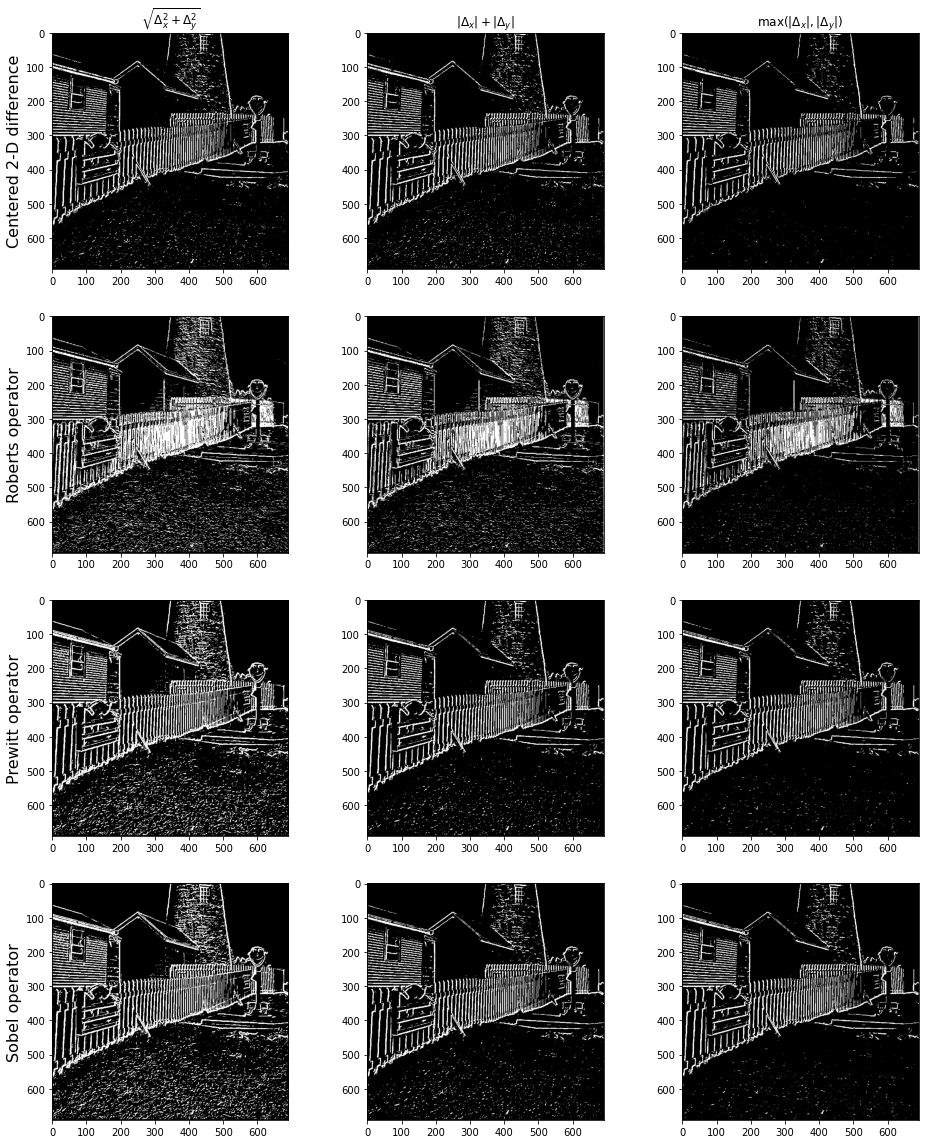

In [9]:
plt.rcParams["figure.figsize"] = (16, 20)

plt.subplot(4, 3, 1)
plt.ylabel('Centered 2-D difference',fontsize=16)
plt.title('$\sqrt{{{\Delta}_x^2} + {{\Delta}_y^2}}$')
plt.imshow(E11, cmap="gray")

plt.subplot(4, 3, 2)
plt.title('${|{{\Delta}_x}| + |{{\Delta}_y}|}$')
plt.imshow(E12, cmap="gray")

plt.subplot(4, 3, 3)
plt.title('max($|{{\Delta}_x}|, |{{\Delta}_y}|$)')
plt.imshow(E13, cmap="gray")

plt.subplot(4, 3, 4)
plt.ylabel('Roberts operator',fontsize=16)
plt.imshow(E21, cmap="gray")

plt.subplot(4, 3, 5)
plt.imshow(E22, cmap="gray")

plt.subplot(4, 3, 6)
plt.imshow(E23, cmap="gray")

plt.subplot(4, 3, 7)
plt.ylabel('Prewitt operator',fontsize=16)
plt.imshow(E31, cmap="gray")

plt.subplot(4, 3, 8)
plt.imshow(E32, cmap="gray")

plt.subplot(4, 3, 9)
plt.imshow(E33, cmap="gray")

plt.subplot(4, 3, 10)
plt.ylabel('Sobel operator',fontsize=16)
plt.imshow(E41, cmap="gray")

plt.subplot(4, 3, 11)
plt.imshow(E42, cmap="gray")

plt.subplot(4, 3, 12)
plt.imshow(E43, cmap="gray")

<h3 style="text-align: center;"> LAPLACIAN EDGE DETECTOR </h3>


In [10]:
def laplacian_edge_map(img):
    window = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    delta_xy = convolve(img,window)
    # delta_xy.astype(np.float64)
    # plt.imshow(delta_xy, cmap="gray")
    # plt.show()

    edge_map = np.zeros_like(delta_xy)
    for i in range(1, delta_xy.shape[0]-1):
        for j in range(1, delta_xy.shape[1]-1):
            is_zero_crossing = False
            if delta_xy[i,j] == 0:
                if delta_xy[i,j-1]*delta_xy[i,j+1] <= 0:
                    is_zero_crossing = True
                elif delta_xy[i-1,j] * delta_xy[i+1,j] <= 0:
                    is_zero_crossing = True
            elif delta_xy[i,j] * delta_xy[i+1,j] <= 0:
                is_zero_crossing = True
            elif delta_xy[i,j] * delta_xy[i,j+1] <= 0:
                is_zero_crossing = True
            if is_zero_crossing:
                edge_map[i,j] = 0
            else:
                edge_map[i,j] = 255
    return edge_map

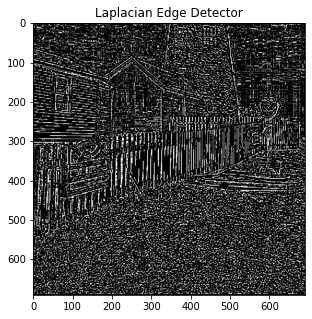

In [11]:
L_EM = laplacian_edge_map(I)
plt.rcParams["figure.figsize"] = (5, 5)
plt.imshow(L_EM,cmap = 'gray')
plt.title('Laplacian Edge Detector')
plt.show()

<h3 style="text-align: center;"> LAPLACIAN OF GAUSSIAN</h3>


In [12]:
def LOG(size = 5,sigma =1 ):
    LOG = np.zeros((size,size),dtype = 'float32')
    xc,yc = size/2,size/2
    PI = np.pi
    K = (1/(PI*sigma**4))
    for i in range(size):
        for j in range(size):
            rr = (i-xc)**2 + (j-yc)**2
            LOG[i][j] = -K*(1 -rr/(2*sigma**2))*np.exp(-rr/(2*sigma**2))
    return LOG 
def LOG_edge_map(img,window_size = 5,sigma = 1):
    
    window = LOG(window_size,sigma)
    delta_xy = convolve(img,window)
    # edge_map = (delta_xy > 0)*255
    edge_map = np.zeros_like(delta_xy)
    for i in range(1, delta_xy.shape[0]-1):
        for j in range(1, delta_xy.shape[1]-1):
            is_zero_crossing = False
            if delta_xy[i,j] == 0:
                if delta_xy[i,j-1]*delta_xy[i,j+1] <= 0:
                    is_zero_crossing = True
                elif delta_xy[i-1,j] * delta_xy[i+1,j] <= 0:
                    is_zero_crossing = True
            elif delta_xy[i,j] * delta_xy[i+1,j] <= 0:
                is_zero_crossing = True
            elif delta_xy[i,j] * delta_xy[i,j+1] <= 0:
                is_zero_crossing = True
            if is_zero_crossing:
                edge_map[i,j] = 0
            else :
                edge_map[i,j] = 255
    return edge_map

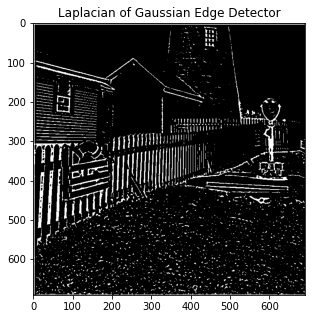

In [13]:
LOG_EM = LOG_edge_map(I,10,1.7)
plt.rcParams["figure.figsize"] = (5, 5)
imgplot = plt.imshow(LOG_EM,cmap = 'gray')
plt.title('Laplacian of Gaussian Edge Detector')
plt.show()

### EDGE DETECTION ON NOISY IMAGES

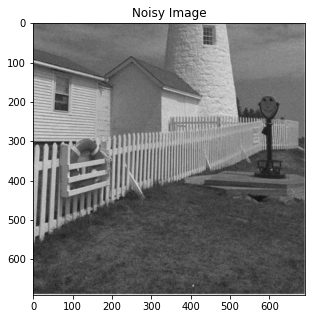

In [14]:
noisy_img = I + 10*np.random.randn(I.shape[0],I.shape[1])
plt.rcParams["figure.figsize"] = (5, 5)
plt.imshow(noisy_img,cmap = 'gray')
plt.title('Noisy Image')
plt.show()

In [15]:
E1 = gradient_edge_map(noisy_img,window_method='centered',mag_method='sqrss',threshold = 12)
E2 = gradient_edge_map(noisy_img,window_method='roberts',mag_method='sqrss',threshold = 12.5)
E3 = gradient_edge_map(noisy_img,window_method='prewitt',mag_method='sqrss',threshold = 12)
E4 = gradient_edge_map(noisy_img,window_method='sobel',mag_method='sqrss',threshold = 12)
L_EM - laplacian_edge_map(noisy_img)
LOG_EM = LOG_edge_map(noisy_img,10,1.65)

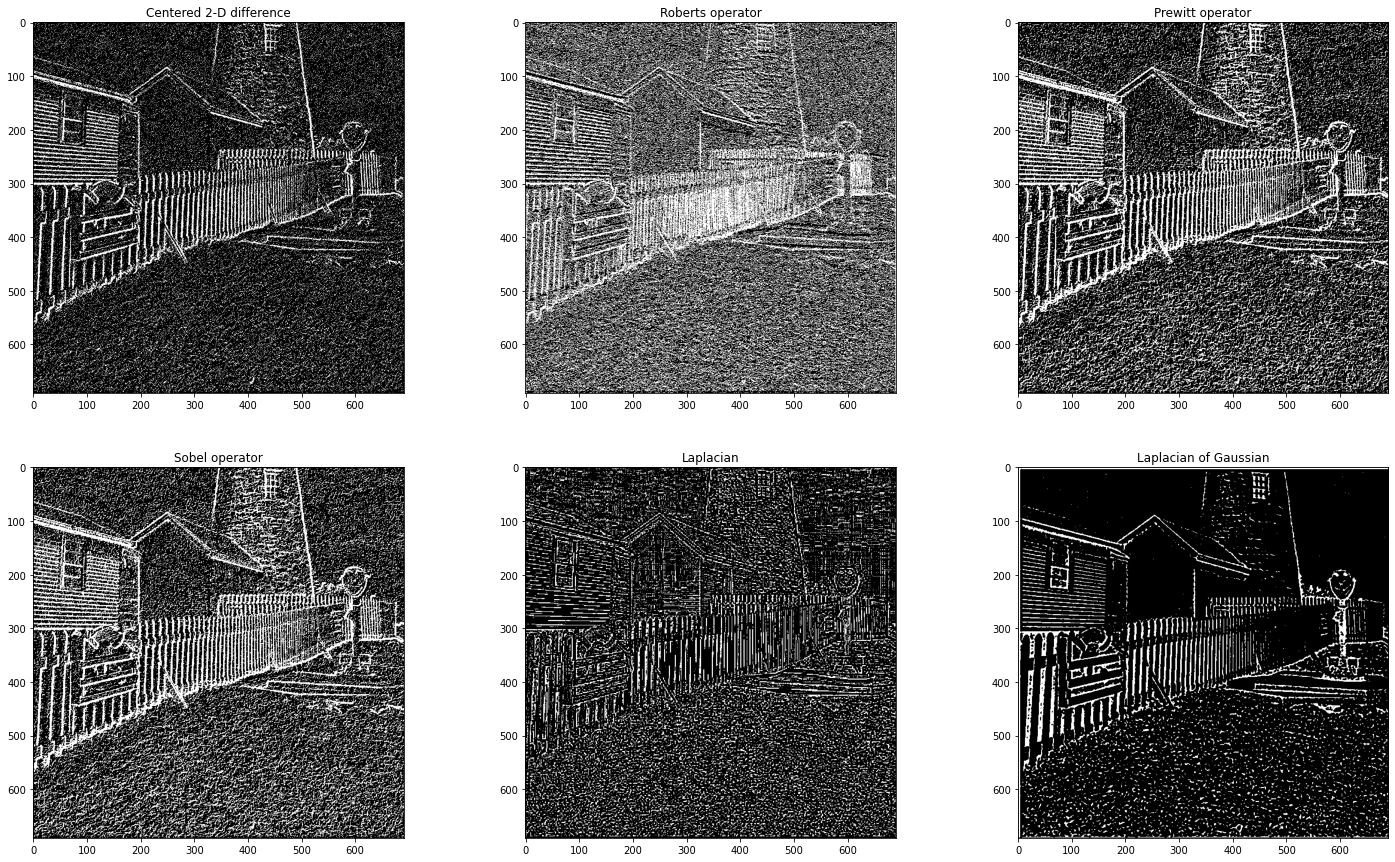

In [16]:

plt.rcParams["figure.figsize"] = (25,15)
plt.subplot(2, 3, 1)
plt.title('Centered 2-D difference')
plt.imshow(E1, cmap="gray")

plt.subplot(2, 3, 2)
plt.title('Roberts operator')
plt.imshow(E2, cmap="gray")

plt.subplot(2, 3, 3)
plt.title('Prewitt operator')
plt.imshow(E3, cmap="gray")

plt.subplot(2, 3, 4)
plt.title('Sobel operator')
plt.imshow(E4, cmap="gray")


plt.subplot(2, 3, 5)
plt.title('Laplacian')
plt.imshow(L_EM, cmap="gray")


plt.subplot(2, 3, 6)
plt.title('Laplacian of Gaussian')
plt.imshow(LOG_EM, cmap="gray")

plt.show()

<h4 style = "text-align : center";> The Laplacian of Gaussian (LOG) edge detector is much more effective for noisy images. </h4>

<h2 style="text-align: center;"> 2. TEMPLATE MATCHING </h2>

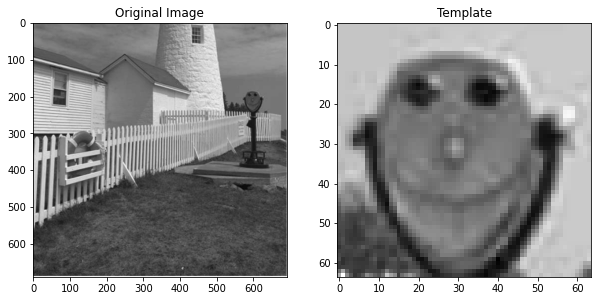

In [17]:
template = plt.imread('template.png')
template = (template[:,:,0]*255).astype('uint8')
plt.rcParams["figure.figsize"] = (10,10)

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(I,cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(template,cmap = 'gray')
plt.title('Template')
plt.show()

#### Function to find normalised cross correlation between two images

In [18]:
def norm_cross_corr(img,template):
    
    M,N = img.shape
    m,n = template.shape
    template = template.astype('float32')
    img = img.astype('float32')
    cross_corr = np.zeros((M,N),dtype = 'float32')
    for i in range(M-m):
        for j in range(N-n):
            EI = np.sum(img[i:i+m,j:j+n]**2)
            ET = np.sum(template**2)
            if ET == 0 or EI == 0:
                cross_corr[i][j] = 0
            else:
                cross_corr[i][j] = (np.sum(img[i:i+m,j:j+n] * template))/(np.sqrt(ET*EI))

    return cross_corr[:M-m,:N-n]

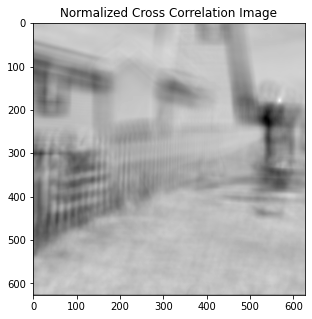

In [19]:
cross = norm_cross_corr(I,template)
plt.rcParams["figure.figsize"] = (5, 5)
plt.imshow(cross,cmap = 'gray')
plt.title('Normalized Cross Correlation Image')
plt.show()

### Thresholding
<p> If we want to a single match, then it is better to choose the maximum value in the normalised cross correlation image as the threshold </p>

In [20]:
threshold = np.max(cross)
posY, posX  = np.unravel_index(np.argmax(cross, axis=None), cross.shape)
print('Threshold = ',threshold)
print('Position of the template = ',posX,posY)

Threshold =  1.0
Position of the template =  568 178


### Template Matching on Noisy Images

In [21]:
M,N = I.shape

threshold = []
cross1 = []
sigma = [1,3,5,10]
noisy_img = []
for i in range(len(sigma)):
    noisy_img.append(I + np.random.randn(M,N)*sigma[i])
    cross1.append(norm_cross_corr(noisy_img[i],template))
    threshold.append(np.max(cross1[i]))
    posY, posX  = np.unravel_index(np.argmax(cross1[i], axis=None), cross1[i].shape)
    print(f'sigma = {sigma[i]}, Threshold = {threshold[i]}')
    print(f'Position of the template = {posX},{posY}')


sigma = 1, Threshold = 0.999936580657959
Position of the template = 568,178
sigma = 3, Threshold = 0.999447762966156
Position of the template = 568,178
sigma = 5, Threshold = 0.9984093904495239
Position of the template = 568,178
sigma = 10, Threshold = 0.993809700012207
Position of the template = 568,178


<h4 style = "text-align : center";> As &sigma; increases, the threshold value reduces </h4>

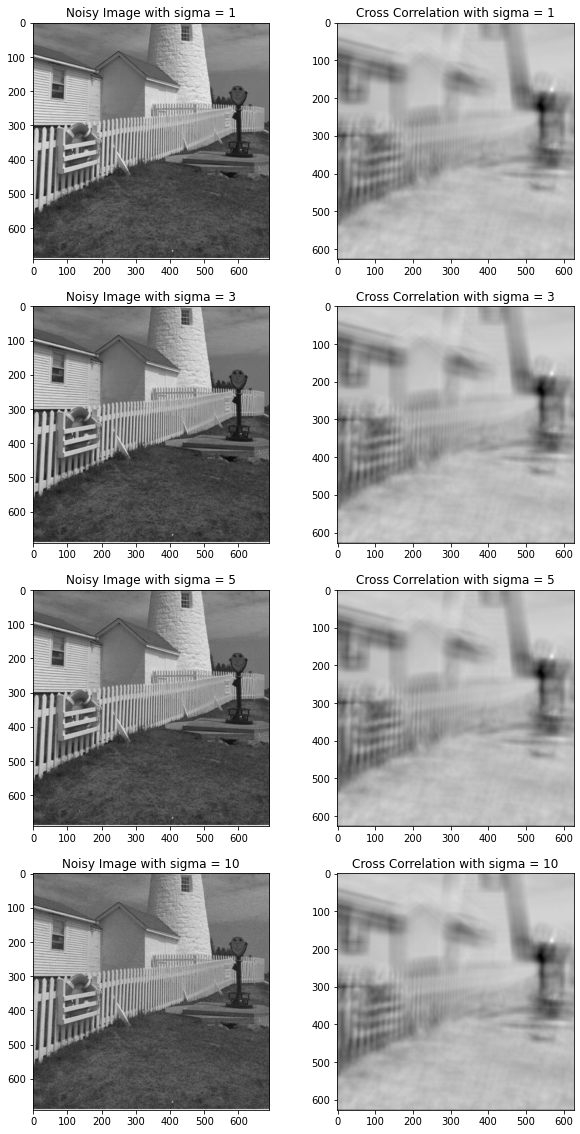

In [23]:
plt.rcParams["figure.figsize"] = (10,20)
for i in range(len(sigma)):
    
    plt.subplot(4,2,2*i+1)
    plt.title(f'Noisy Image with sigma = {sigma[i]}' )
    plt.imshow(noisy_img[i],cmap = 'gray')
    plt.subplot(4,2,2*i+2)
    plt.title(f'Cross Correlation with sigma = {sigma[i]}')
    plt.imshow(cross1[i],cmap = 'gray')
    


### Function to rotate an image by an angle theta

In [24]:
def rotate(img,angle):

    rotation_mat = (np.array([[np.cos(angle),np.sin(angle)],
                            [-np.sin(angle),np.cos(angle)]]))

    M,N = img.shape
    output_sizex,output_sizey = int(N*np.cos(angle)+M*np.sin(angle))+1,int(M*np.cos(angle)+N*np.sin(angle))+1


    rot_img = np.zeros((output_sizex,output_sizey),dtype='float32') 

    for i in range(M): 
        for j in range(N):
            curr_coord = np.array([[j-N//2],[i-M//2]])
   
            new_coord = np.dot(rotation_mat,curr_coord)

            new_x = output_sizex//2 + int(new_coord[0])
            new_y = output_sizey//2 + int(new_coord[1])
            
            rot_img[new_y,new_x] = img[i,j]
    ### INTERPOLATION ###
    for i in range(1,output_sizex-1):
        for j in range(1,output_sizey-1):
            if rot_img[i,j] == 0:
                rot_img[i,j] =  0.125*(rot_img[i-1,j]  + rot_img[i+1,j] + rot_img[i,j-1] + rot_img[i,j+1] + rot_img[i-1,j-1] + rot_img[i-1,j+1] + rot_img[i+1,j-1] + rot_img[i+1,j+1])
    return rot_img.astype('uint8')

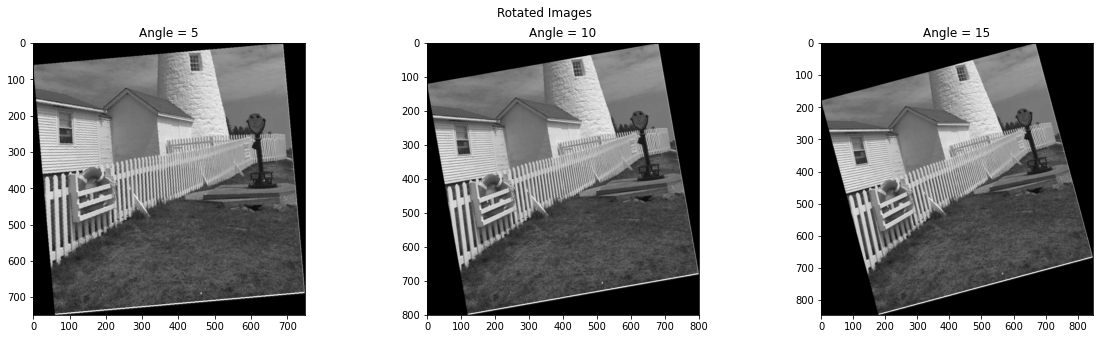

In [25]:
angles = [5,10,15]
rotate_img = []
plt.rcParams["figure.figsize"] = (20,5)
plt.suptitle('Rotated Images')
for i in range(3):

    angle = angles[i]*np.pi/180
    rotate_img.append(rotate(I,angle))
    plt.subplot(1,3,i+1)
    plt.title(f'Angle = {angles[i]}')
    plt.imshow(rotate_img[i],cmap = 'gray')


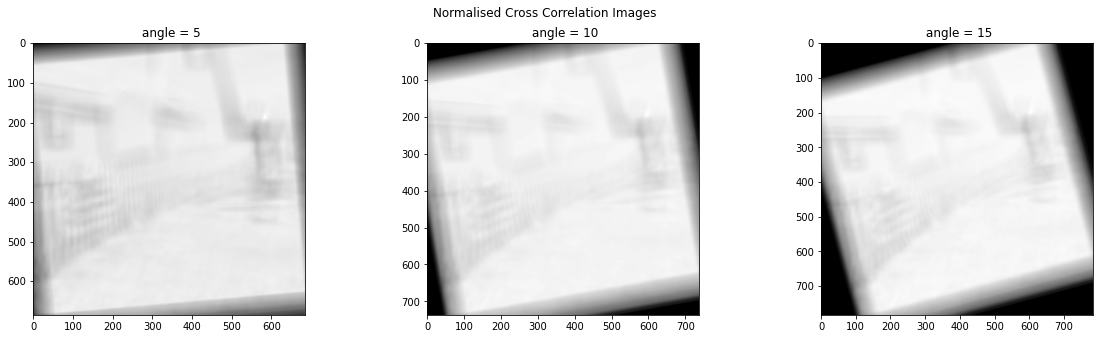

In [26]:
plt.suptitle('Normalised Cross Correlation Images')
cross = []
for i in range(3):
    cross.append(norm_cross_corr(rotate_img[i],template))
    plt.subplot(1,3,i+1)
    plt.imshow(cross[i],cmap = 'gray')
    plt.title(f' angle = {angles[i]}')


In [27]:
for i in range(3):
    threshold = np.max(cross[i])
    posY, posX  = np.unravel_index(np.argmax(cross[i], axis=None), cross[i].shape)
    print(f'Angle = {angles[i]}, Threshold = {threshold}')
    print(f'Position of the template = {posX},{posY}')

Angle = 5, Threshold = 0.9929550886154175
Position of the template = 584,186
Angle = 10, Threshold = 0.9833852648735046
Position of the template = 596,192
Angle = 15, Threshold = 0.9732010364532471
Position of the template = 603,196


<h4 style = "text-align : center";> The threshold decreases as the rotation angle increases </h4>